In [75]:
import struct as st
import numpy as np
import matplotlib.pyplot as plt

In [76]:
def read(imgs_filename, lbls_filename):
    imgs = None
    with open(imgs_filename, 'rb') as imgs_file:
        _, nimgs, height, width = st.unpack('>IIII', imgs_file.read(4 * 4))
        imgs = np.fromfile(imgs_file, dtype=np.uint8).reshape(nimgs, height * width)
        imgs_file.close()
    lbls = None
    with open(lbls_filename, 'rb') as lbls_file:
        _, nlbls = st.unpack('>II', lbls_file.read(2 * 4))
        lbls = np.fromfile(lbls_file, dtype=np.uint8)
        lbls_file.close()
    return imgs, lbls

In [77]:
height = 28
width = 28
def imshow(img, lbl='', cmap='gray', xlbl='', ylbl=''):
    plt.imshow(255 - img.reshape(height, width), cmap)
    plt.title(lbl)
    plt.xticks([])
    plt.xlabel(xlbl)
    plt.yticks([])
    plt.ylabel(ylbl)

In [78]:
train = {}
train['imgs'], train['lbls'] = read('./datasets/train-images.idx3-ubyte', './datasets/train-labels.idx1-ubyte')
test = {}
test['imgs'], test['lbls'] = read('./datasets/test-images.idx3-ubyte', './datasets/test-labels.idx1-ubyte')

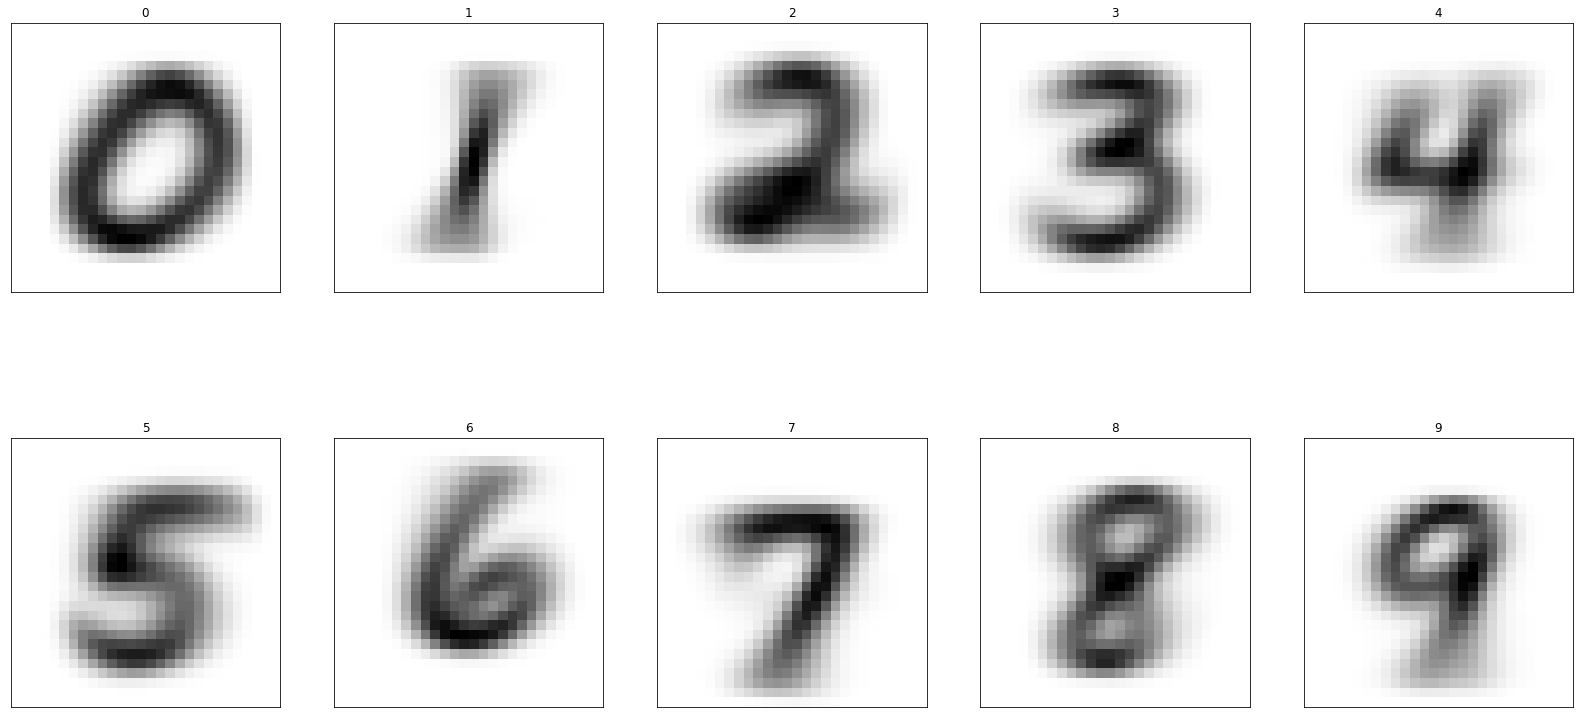

In [79]:
lbls = list(set(train['lbls']))
mean_train = [np.mean(train['imgs'][train['lbls'] == lbl], axis=0) for lbl in lbls]
plt.figure(figsize=(height, width // 2))
for i in range(len(lbls)):
    plt.subplot(2, len(lbls) // 2, i + 1)
    imshow(mean_train[i], lbls[i])
plt.show()

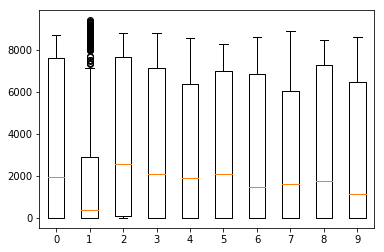

In [81]:
std_train = [np.mean(train['imgs'][train['lbls'] == lbl], axis=0) for lbl in lbls]
norm_train = [np.linalg.norm(train['imgs'][train['lbls'] == lbls[i]] - mean_train[i], axis=0) for i in range(len(lbls))]
plt.figure()
plt.boxplot(norm_train)
plt.xticks(range(1, len(lbls) + 1), lbls)
plt.show()